# Load Libraries 

In [1]:
import sys
from os import listdir
from os.path import isfile, join
import math
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import gc
import re

# Paths to Files and pH range

In [2]:
phs  = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [3]:
data = []
for n, ph in enumerate(phs):
    data_sub = []
    with open('../apo_data_raw/pH_{}.dat'.format(ph), 'r') as f:
        for line in f:
            if "#" not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                line = []
                for dat in split_line:
                    line.append(float(dat))
                data_sub.append(line)
    data.append(data_sub)

## Post Process Data

In [4]:
cutoff = 3.5
hbn_data = []
for n, ph in enumerate(phs):
    hbn_count = 0
    hb1_count = 0
    w2_count  = 0
    hb2_count = 0
    for dat in data[n]:
        if dat[1] <= cutoff and dat[2] == 1 and dat[3] <= cutoff:
            hbn_count += 1
        if dat[1] <= cutoff:
            hb1_count += 1
        if dat[2] == 1:
            w2_count +=1
        if dat[3] <= cutoff: 
            hb2_count += 1
    HBN = hbn_count/len(data[n])
    HB1 = hb1_count/len(data[n])
    w2  = w2_count/len(data[n])
    HB2 = hb2_count/len(data[n])
    
    #print(f'pH: {ph} ---------------')
    #print(f'Full: {HBN:0.2f}')
    #print(f'W41-Y77: {HB1:0.2f}')
    #print(f'Wat-2: {w2:0.2f}')
    #print(f'S36-D34: {HB2:0.2f}')          
    hbn_data.append([ph, HBN, HB1, w2, HB2])
        


# Plot

(0.0, 1.0)

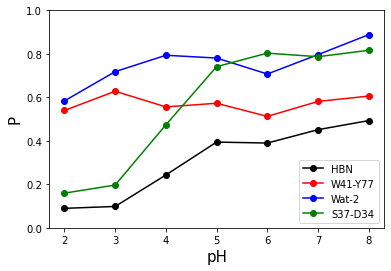

In [5]:
legend = ['HBN', 'W41-Y77', 'Wat-2', 'S37-D34']
plt.plot([x[0] for x in hbn_data], [y[1] for y in hbn_data], 'o-', color='Black')
plt.plot([x[0] for x in hbn_data], [y[2] for y in hbn_data], 'o-', color='Red')
plt.plot([x[0] for x in hbn_data], [y[3] for y in hbn_data], 'o-', color='Blue')
plt.plot([x[0] for x in hbn_data], [y[4] for y in hbn_data], 'o-', color='Green')

plt.legend(legend)
#plt.hlines(np.mean([y[1] for y in water_bridge_data]), 4, 8, color='red')
plt.ylabel('P', fontsize=15)
plt.xlabel('pH', fontsize=15)
plt.ylim(0, 1)

Save Data

In [6]:
with open('../data/HBN_apo_stage_11_to_65.dat', 'w') as o:
    o.write("# pH, HBN, W41-Y77, Wat-2, S37-D34 \n")
    for data in hbn_data:
        o.write(f'{data[0]} {data[1]:0.2f} {data[2]:0.2f} {data[3]:0.2f} {data[4]:0.2f} \n')